# BEGINNER TRACK DATATHON

## Read Ins and Imports

In [ ]:
# standard imports with usefulness to our project
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# reading in the data
loanSet = pd.read_csv('track.csv')

In [ ]:
# checking initialy the overall shape, values, etc. of our data to get an initial feel for it
loanSet['accepted'].value_counts()

1.0    119267
0.0     16994
Name: accepted, dtype: int64

In [ ]:
loanSet.shape

(136261, 38)

In [ ]:
loanSet.head()

,year,state_code,county_code,msa,census_tract,applicant_age,applicant_age_above_62,race,ethnicity,sex,income,debt_to_income_ratio,tract_one_to_four_family_homes,tract_median_age_of_hu,tract_minority_pop_percent,tract_population,tract_to_msa_income_percentage,lei,aus,purchaser_type,ffiec_msa_md_median_fam_income,balloon_payment,business_or_commercial_purpose,combined_loan_to_value_ratio,conforming_loan_limit,construction_method,discount_points,interest_rate,lender_credits,loan_amount,loan_type,lien_status,occupancy_type,property_value,total_loan_costs,total_units,accepted,denial_reason
0,2019,TX,48201.0,26420.0,4.820142e+10,45-54,0.0,Native Hawaiian or Other Pacific Islander,Hispanic or Latino,Male,26.0,>60%,2331.0,39.0,84.39,6949.0,86.0,7H6GLXDRUGQFU57RNE97,NaN,NaN,77100.0,0.0,0.0,99.640,C,Site-built,NaN,NaN,NaN,95000.0,Conventional,Subordinate Lien,Principal residence,155000.0,NaN,1.0,0.0,Debt-to-income ratio
1,2019,TX,48201.0,26420.0,4.820143e+10,55-64,0.0,White,Not Hispanic or Latino,Joint,379.0,>60%,1202.0,35.0,24.86,3270.0,360.0,7H6GLXDRUGQFU57RNE97,NaN,NaN,77100.0,0.0,0.0,68.617,NC,Site-built,NaN,NaN,NaN,3225000.0,Conventional,First Lien,Principal residence,4705000.0,NaN,1.0,0.0,Debt-to-income ratio
2,2019,TX,48201.0,26420.0,4.820122e+10,45-54,0.0,Asian,Hispanic or Latino,Joint,86.0,41%-<46%,1261.0,45.0,89.71,4803.0,50.0,7H6GLXDRUGQFU57RNE97,NaN,NaN,77100.0,0.0,0.0,58.330,C,Site-built,NaN,6.010,NaN,105000.0,Conventional,First Lien,Principal residence,185000.0,NaN,1.0,1.0,NaN
3,2019,TX,48201.0,26420.0,4.820152e+10,55-64,1.0,White,Hispanic or Latino,Female,25.0,36%-<41%,651.0,41.0,75.32,3991.0,66.0,7H6GLXDRUGQFU57RNE97,NaN,NaN,77100.0,0.0,0.0,18.220,C,Site-built,NaN,6.125,NaN,65000.0,Conventional,First Lien,Principal residence,375000.0,NaN,1.0,1.0,NaN
4,2019,TX,48201.0,26420.0,4.820133e+10,65-74,1.0,White,Not Hispanic or Latino,Male,33.0,20%-<30%,871.0,44.0,94.26,6028.0,52.0,7H6GLXDRUGQFU57RNE97,NaN,NaN,77100.0,0.0,0.0,30.330,C,Site-built,NaN,4.500,NaN,75000.0,Conventional,First Lien,Principal residence,235000.0,NaN,1.0,1.0,NaN


## Data Cleaning

### Dealing with Null Values

After the initial section of reading in data, we have to clean and process our data in reasonable ways, so that it is ready for analysis and modeling in the future.

In [ ]:
# first, taking a look at how many null values our data has
loanSet.isna().sum()

year                                   0
state_code                            41
county_code                            0
msa                                    0
census_tract                         641
applicant_age                          0
applicant_age_above_62                 0
race                                   0
ethnicity                              0
sex                                    0
income                              1033
debt_to_income_ratio                2789
tract_one_to_four_family_homes         0
tract_median_age_of_hu                 0
tract_minority_pop_percent             0
tract_population                       0
tract_to_msa_income_percentage         0
lei                                    0
aus                                17808
purchaser_type                     41343
ffiec_msa_md_median_fam_income         0
balloon_payment                        0
business_or_commercial_purpose         0
combined_loan_to_value_ratio        6630
conforming_loan_

In [ ]:
# next, we fill null values with reasonable replacements
# for things like denial reason and purchaser type, we had lots of nulls where they weren't applicable to the row
loanSet["denial_reason"].fillna("Accepted", inplace = True)
loanSet["purchaser_type"].fillna("No Purchaser", inplace = True)
# we then filled in the feilds that had nulls when there wasn't an entry, meaning they were 0
loanSet["discount_points"].fillna(0, inplace = True)
loanSet["lender_credits"].fillna(0, inplace = True)

In [ ]:
# here, we're changing the data type of the values to work more effectively with
loanSet['accepted'] = loanSet['accepted'].astype(float)
loanSet['applicant_age_above_62'] = loanSet['applicant_age_above_62'].astype(int)
loanSet['balloon_payment'] = loanSet['balloon_payment'].astype(int)
loanSet['business_or_commercial_purpose'] = loanSet['business_or_commercial_purpose'].astype(int)
loanSet['total_units'] = loanSet['total_units'].astype(int)

In [ ]:
# we filled the empty interest rate and loan costs rows with 0 as they represented rejected loaners
loanSet['interest_rate'].fillna(0, inplace = True)

In [ ]:
loanSet['total_loan_costs'].fillna(0, inplace = True)

In [ ]:
loanSet.head()

,year,state_code,county_code,msa,census_tract,applicant_age,applicant_age_above_62,race,ethnicity,sex,income,debt_to_income_ratio,tract_one_to_four_family_homes,tract_median_age_of_hu,tract_minority_pop_percent,tract_population,tract_to_msa_income_percentage,lei,aus,purchaser_type,ffiec_msa_md_median_fam_income,balloon_payment,business_or_commercial_purpose,combined_loan_to_value_ratio,conforming_loan_limit,construction_method,discount_points,interest_rate,lender_credits,loan_amount,loan_type,lien_status,occupancy_type,property_value,total_loan_costs,total_units,accepted,denial_reason
0,2019,TX,48201.0,26420.0,4.820142e+10,45-54,0,Native Hawaiian or Other Pacific Islander,Hispanic or Latino,Male,26.0,>60%,2331.0,39.0,84.39,6949.0,86.0,7H6GLXDRUGQFU57RNE97,NaN,No Purchaser,77100.0,0,0,99.640,C,Site-built,0.0,0.000,0.0,95000.0,Conventional,Subordinate Lien,Principal residence,155000.0,0.0,1,0.0,Debt-to-income ratio
1,2019,TX,48201.0,26420.0,4.820143e+10,55-64,0,White,Not Hispanic or Latino,Joint,379.0,>60%,1202.0,35.0,24.86,3270.0,360.0,7H6GLXDRUGQFU57RNE97,NaN,No Purchaser,77100.0,0,0,68.617,NC,Site-built,0.0,0.000,0.0,3225000.0,Conventional,First Lien,Principal residence,4705000.0,0.0,1,0.0,Debt-to-income ratio
2,2019,TX,48201.0,26420.0,4.820122e+10,45-54,0,Asian,Hispanic or Latino,Joint,86.0,41%-<46%,1261.0,45.0,89.71,4803.0,50.0,7H6GLXDRUGQFU57RNE97,NaN,No Purchaser,77100.0,0,0,58.330,C,Site-built,0.0,6.010,0.0,105000.0,Conventional,First Lien,Principal residence,185000.0,0.0,1,1.0,Accepted
3,2019,TX,48201.0,26420.0,4.820152e+10,55-64,1,White,Hispanic or Latino,Female,25.0,36%-<41%,651.0,41.0,75.32,3991.0,66.0,7H6GLXDRUGQFU57RNE97,NaN,No Purchaser,77100.0,0,0,18.220,C,Site-built,0.0,6.125,0.0,65000.0,Conventional,First Lien,Principal residence,375000.0,0.0,1,1.0,Accepted
4,2019,TX,48201.0,26420.0,4.820133e+10,65-74,1,White,Not Hispanic or Latino,Male,33.0,20%-<30%,871.0,44.0,94.26,6028.0,52.0,7H6GLXDRUGQFU57RNE97,NaN,No Purchaser,77100.0,0,0,30.330,C,Site-built,0.0,4.500,0.0,75000.0,Conventional,First Lien,Principal residence,235000.0,0.0,1,1.0,Accepted


In [ ]:
loanSet['purchaser_type'].unique()

array(['No Purchaser',
       'Commercial bank, savings bank, or savings association',
       'Ginnie Mae', 'Freddie Mac', 'Fannie Mae',
       'Other type of purchaser', 'Affiliate institution',
       'Credit union, mortgage company, or finance company',
       'Life insurance company', 'Private securitizer', 'Farmer Mac'],
      dtype=object)

In [ ]:
# dropping several fields with high rates of null values, as they were not useful in our evaluation
loanSet.drop(['aus', 'lei', 'state_code', 'denial_reason', 'conforming_loan_limit'], axis=1, inplace=True)

In [ ]:
# lastly, droppping leftover rows with null values as they represent mistakes or unknowns that are not useful to work with
loanSet.isna().sum()
loanSet.dropna(inplace = True)

In [ ]:
loanSet

,year,county_code,msa,census_tract,applicant_age,applicant_age_above_62,race,ethnicity,sex,income,debt_to_income_ratio,tract_one_to_four_family_homes,tract_median_age_of_hu,tract_minority_pop_percent,tract_population,tract_to_msa_income_percentage,purchaser_type,ffiec_msa_md_median_fam_income,balloon_payment,business_or_commercial_purpose,combined_loan_to_value_ratio,construction_method,discount_points,interest_rate,lender_credits,loan_amount,loan_type,lien_status,occupancy_type,property_value,total_loan_costs,total_units,accepted
0,2019,48201.0,26420.0,4.820142e+10,45-54,0,Native Hawaiian or Other Pacific Islander,Hispanic or Latino,Male,26.0,>60%,2331.0,39.0,84.39,6949.0,86.0,No Purchaser,77100.0,0,0,99.640,Site-built,0.0,0.000,0.0,95000.0,Conventional,Subordinate Lien,Principal residence,155000.0,0.00,1,0.0
1,2019,48201.0,26420.0,4.820143e+10,55-64,0,White,Not Hispanic or Latino,Joint,379.0,>60%,1202.0,35.0,24.86,3270.0,360.0,No Purchaser,77100.0,0,0,68.617,Site-built,0.0,0.000,0.0,3225000.0,Conventional,First Lien,Principal residence,4705000.0,0.00,1,0.0
2,2019,48201.0,26420.0,4.820122e+10,45-54,0,Asian,Hispanic or Latino,Joint,86.0,41%-<46%,1261.0,45.0,89.71,4803.0,50.0,No Purchaser,77100.0,0,0,58.330,Site-built,0.0,6.010,0.0,105000.0,Conventional,First Lien,Principal residence,185000.0,0.00,1,1.0
3,2019,48201.0,26420.0,4.820152e+10,55-64,1,White,Hispanic or Latino,Female,25.0,36%-<41%,651.0,41.0,75.32,3991.0,66.0,No Purchaser,77100.0,0,0,18.220,Site-built,0.0,6.125,0.0,65000.0,Conventional,First Lien,Principal residence,375000.0,0.00,1,1.0
4,2019,48201.0,26420.0,4.820133e+10,65-74,1,White,Not Hispanic or Latino,Male,33.0,20%-<30%,871.0,44.0,94.26,6028.0,52.0,No Purchaser,77100.0,0,0,30.330,Site-built,0.0,4.500,0.0,75000.0,Conventional,First Lien,Principal residence,235000.0,0.00,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136256,2020,48201.0,26420.0,4.820131e+10,55-64,0,White,Not Hispanic or Latino,Male,330.0,50%-60%,384.0,17.0,50.52,3193.0,200.0,No Purchaser,80000.0,0,1,80.000,Site-built,0.0,0.000,0.0,245000.0,Conventional,First Lien,Investment property,305000.0,0.00,1,0.0
136257,2020,48201.0,26420.0,4.820155e+10,55-64,0,White,Not Hispanic or Latino,Male,138.0,30%-<36%,2639.0,24.0,47.16,7452.0,144.0,Freddie Mac,80000.0,0,0,61.000,Site-built,0.0,2.500,0.0,255000.0,Conventional,First Lien,Principal residence,415000.0,5022.77,1,1.0
136258,2020,48201.0,26420.0,4.820132e+10,35-44,0,White,Hispanic or Latino,Female,106.0,>60%,2022.0,55.0,76.81,7732.0,58.0,No Purchaser,80000.0,0,0,100.000,Site-built,0.0,0.000,0.0,135000.0,FHA,First Lien,Principal residence,135000.0,0.00,1,0.0
136259,2020,48201.0,26420.0,4.820125e+10,25-34,0,White,Hispanic or Latino,Male,91.0,30%-<36%,2134.0,32.0,20.22,6062.0,117.0,Freddie Mac,80000.0,0,0,95.000,Site-built,0.0,3.875,0.0,215000.0,Conventional,First Lien,Principal residence,225000.0,2917.68,1,1.0


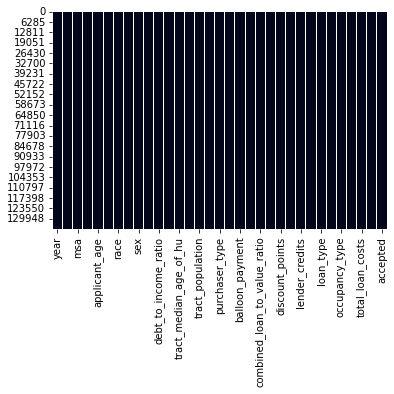

In [ ]:
# checking to be sure our dataframe is fully complete with a heatmap
sns.heatmap(loanSet.isnull(), cbar=False)

## Visualizations

After our data was cleaned and null values removed, we moved into visualization to understand and analyze some relations in our data. We started from a very zoomed out view, then narrowed our focus onto different, interesting relationships.

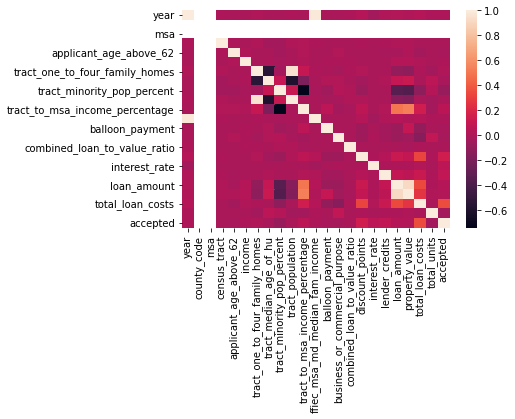

In [ ]:
# this is an initial correlation heatmap to quickly view any correlations that jump out from the rest
sns.heatmap(loanSet.corr())

In [ ]:
# as our first focus is to predict whether a loaner was accepted, we took the highest and lowest correlations against
# accepted to look further into
top_cor = list(loanSet.corr('pearson').sort_values('accepted', ascending = False).index[:7])

In [ ]:
neg_cor = list(loanSet.corr('pearson').sort_values('accepted', ascending = True).index[:5])

In [ ]:
neg_cor.append('accepted')
top_cor, neg_cor

(['accepted',
  'total_loan_costs',
  'discount_points',
  'lender_credits',
  'interest_rate',
  'tract_to_msa_income_percentage',
  'loan_amount'],
 ['tract_minority_pop_percent',
  'total_units',
  'business_or_commercial_purpose',
  'tract_median_age_of_hu',
  'applicant_age_above_62',
  'accepted'])

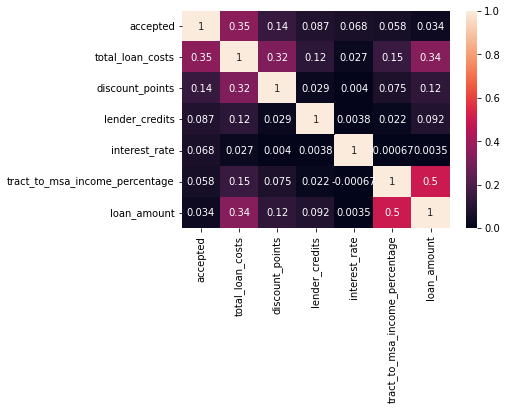

In [ ]:
# correlation heatmap of highest correlations
sns.heatmap(loanSet[top_cor].corr(), annot=True)

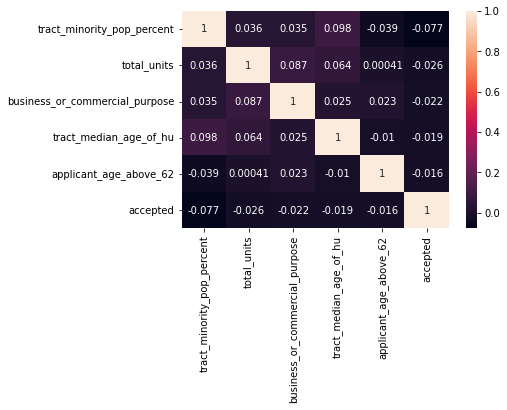

In [ ]:
# correlation heatmap of lowest correlations
sns.heatmap(loanSet[neg_cor].corr(), annot=True)

In [ ]:
# as each graph with the full dataset was taking a very long time to load, we used a sample dataset of 10,000 rows for easier viewing
# and faster loading time
sampleSet = loanSet.sample(n = 10000, random_state = 2022)

In [ ]:
sampleSet.head()

,year,county_code,msa,census_tract,applicant_age,applicant_age_above_62,race,ethnicity,sex,income,debt_to_income_ratio,tract_one_to_four_family_homes,tract_median_age_of_hu,tract_minority_pop_percent,tract_population,tract_to_msa_income_percentage,purchaser_type,ffiec_msa_md_median_fam_income,balloon_payment,business_or_commercial_purpose,combined_loan_to_value_ratio,construction_method,discount_points,interest_rate,lender_credits,loan_amount,loan_type,lien_status,occupancy_type,property_value,total_loan_costs,total_units,accepted
131639,2020,48201.0,26420.0,4.820154e+10,35-44,0,Black or African American,Not Hispanic or Latino,Male,36.0,41%-<46%,5886.0,10.0,76.63,19461.0,100.0,Ginnie Mae,80000.0,0,0,96.5,Site-built,0.00,2.875,0.00,175000.0,FHA,First Lien,Principal residence,185000.0,7286.55,1,1.0
75994,2019,48201.0,26420.0,4.820123e+10,35-44,0,White,Hispanic or Latino,Male,48.0,>60%,3011.0,12.0,89.77,11232.0,88.0,No Purchaser,77100.0,0,0,96.5,Site-built,0.00,0.000,0.00,235000.0,FHA,First Lien,Principal residence,235000.0,0.00,1,0.0
13946,2018,48201.0,26420.0,4.820125e+10,25-34,0,White,Not Hispanic or Latino,Female,65.0,30%-<36%,2134.0,32.0,20.22,6062.0,117.0,"Commercial bank, savings bank, or savings asso...",75600.0,0,0,95.0,Site-built,119.28,4.875,0.00,165000.0,Conventional,First Lien,Principal residence,175000.0,4556.39,1,1.0
118429,2020,48201.0,26420.0,4.820155e+10,25-34,0,White,Hispanic or Latino,Female,63.0,50%-60%,1933.0,30.0,93.21,7207.0,83.0,No Purchaser,80000.0,0,0,96.5,Site-built,0.00,3.625,2500.00,155000.0,FHA,First Lien,Principal residence,165000.0,6818.11,1,1.0
29816,2018,48201.0,26420.0,4.820154e+10,25-34,0,White,Hispanic or Latino,Female,54.0,41%-<46%,2905.0,23.0,82.41,12545.0,87.0,Other type of purchaser,75600.0,0,0,96.5,Site-built,0.00,5.375,7238.82,175000.0,FHA,First Lien,Principal residence,175000.0,10569.91,1,1.0


KeyError: ignored

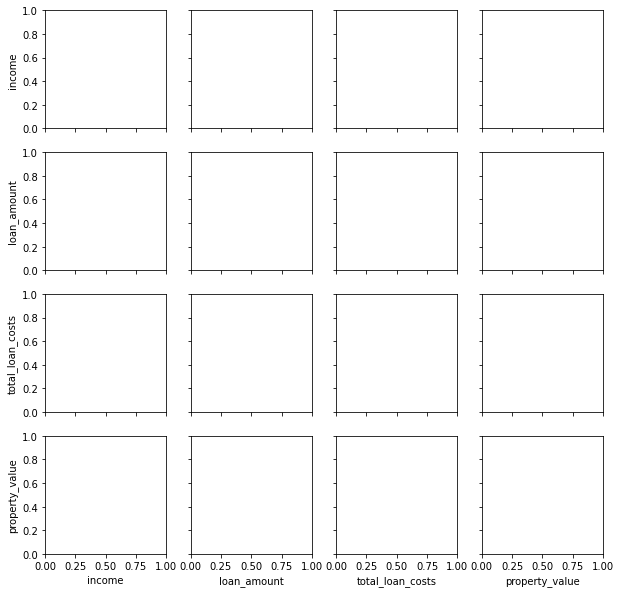

In [ ]:
pairSet = sampleSet[['income', "loan_amount", "total_loan_costs", "property_value"]]
sns.pairplot(pairSet, hue = 'accepted')

In [ ]:
# we wanted to investigate the relationship between area income and acceptance, so we used a histogram and colored the accepted 
sns.histplot(data=sampleSet, x='tract_to_msa_income_percentage', hue = 'accepted')

In [ ]:
# this is a cramped histogram plot of races prevelant in the dataset and their acceptence
# a big takeaway from this is the relative prevelance of white people in the collection even though Houston has only 
# about a 55% prevelance in Hosuton
sns.histplot(data=sampleSet, x ='race', hue = 'accepted')

Next, we evaluated several other relationships that we thought might be interesting

In [ ]:
sns.scatterplot(data = smapleSet, y = 'loan_amount', x = 'tract_to_msa_income_percentage')

In [ ]:
sns.histplot(data=sampleSet, x='income', binrange = (0,1000), hue = 'accepted')

In [ ]:
sns.displot(data=sampleSet, x='income', binrange = (0,600), hue = 'accepted')

We wanted to further look into the income relationships, so we made seperate tables out of loanSet to see what differences in the acceptance rate appeared

In [ ]:
lowIncome = loanSet[loanSet['income']<loanSet['income'].quantile(.15)]

In [ ]:
highIncome = loanSet[loanSet['income']>loanSet['income'].quantile(.85)]

In [ ]:
lowIncome_accepted = (lowIncome['accepted'] == 1).sum()
lowIncome_denied = (lowIncome['accepted'] == 0).sum()

In [ ]:
lowIncome_df = [lowIncome_accepted, lowIncome_denied]

In [ ]:
plt.pie(lowIncome_df)
plt.title("Low Income Applicants")
plt.legend(labels = ['Accepted', "Rejected"])

In [ ]:
highIncome_accepted = (highIncome['accepted'] == 1).sum()
highIncome_denied = (highIncome['accepted'] == 0).sum()

In [ ]:
highIncome_df = [highIncome_accepted, highIncome_denied]

In [ ]:
plt.pie(highIncome_df)
plt.title("High Income Applicants")
plt.legend(labels = ['Accepted', "Rejected"])

In [ ]:
sns.scatterplot(data = sampleSet, x = 'loan_amount', y = 'tract_to_msa_income_percentage', hue = 'accepted')

In [ ]:
sns.scatterplot(data = sampleSet, x = 'loan_amount', y = 'property_value', hue = 'accepted')

## One Hot Encoding and Column Workings

In this section, we went through some standard procedures in one-hot encoding and df manipulation to make the dataset ready for modeling

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
loanSet.columns

In [ ]:
# our df was cluttered and too specified for effective modeling
# the first thing we wanted to do was cut down the clutter and leave only meainingful columns for our model
loanSet = loanSet[['applicant_age_above_62', 'race','sex', 'income','debt_to_income_ratio', 'discount_points','lender_credits',
                   'tract_to_msa_income_percentage', 'ffiec_msa_md_median_fam_income', 'business_or_commercial_purpose', 
                   'combined_loan_to_value_ratio','interest_rate', 'loan_amount', 'loan_type','property_value', 'total_loan_costs',
                   'accepted']]

In [ ]:
loanSet['debt_to_income_ratio'].unique()

In [ ]:
debtincome_sort = ['>60%', '50%-60%', '46%-<50%', '41%-<46%', '36%-<41%', '30%-<36%', '30%-<36%', '20%-<30%', '<20%' ]
debtincome_encoder = OrdinalEncoder(categories=[debtincome_sort])

In [ ]:
loanSet['debtincome_sort'] = debtincome_encoder.fit_transform(loanSet['debt_to_income_ratio'].values.reshape(-1, 1))

In [ ]:
loanSet['debt_to_income_ratio'].value_counts()

In [ ]:
loanSet.drop(labels=["debt_to_income_ratio"], axis=1, inplace=True)

In [ ]:
loanSet['race'] = loanSet['race'].replace(['Free Form Text Only'],'Race - Other')
loanSet['race'] = loanSet['race'].replace(['Joint'],'Race - Joint')
dummies_race = pd.get_dummies(loanSet['race'])
loanSet = pd.concat([loanSet, dummies_race], axis=1)
loanSet.drop(labels=["race"], axis=1, inplace=True)
loanSet.head()

In [ ]:
loanSet['sex'] = loanSet['sex'].replace(['Joint'],'Sex - Joint')
dummies_sex = pd.get_dummies(loanSet['sex'])
loanSet = pd.concat([loanSet, dummies_sex], axis=1)
loanSet.drop(labels=["sex"], axis=1, inplace=True)
loanSet.head()

In [ ]:
dummies_loan_type = pd.get_dummies(loanSet['loan_type'])
loanSet = pd.concat([loanSet, dummies_loan_type], axis=1)
loanSet.drop(labels=["loan_type"], axis=1, inplace=True)
loanSet.head()

In [ ]:
def encode_binary_variable(df, col, val_pos, val_neg):
    df[col] = df[col].replace({val_pos:1, val_neg:0})

In [ ]:
loanSet.head()

In [ ]:
# after encoding and cleaning, this is the shape of our data
loanSet.shape

## Modeling

Next, we are ready for the modeling portion. First, we are going to use logistic regression to attempt to classify the rows as accepted or not accepted.

In [ ]:
loanSet.columns

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = loanSet.drop(labels=["accepted"], axis=1)
y = loanSet["accepted"]

In [ ]:
# create testing dataset
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=2022)
# create training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=2022)

In [ ]:
# importing regression model
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression(random_state=2022, max_iter=100000)

In [ ]:
logreg.fit(X_train, y_train)

In [ ]:
y_pred = logreg.predict(X_val)

In [ ]:
# looking quickly at the counts of each in 
(unique, counts) = np.unique(y_pred, return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies

### Model Performance

Next, we're going to use scikit learn's built in model evalutations to see how well our baseline model performed

In [ ]:
loanSet['accepted'].value_counts()
print(str(loanSet['accepted'].value_counts()[1]/(loanSet['accepted'].value_counts()[1]+loanSet['accepted'].value_counts()[0])*100)+"% of entries correspond to accepted loans")

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
print("Accuracy: ", accuracy_score(y_val, y_pred))

In [ ]:
print("Precision for Accepted Applications: ", precision_score(y_val, y_pred))
print("Recall for Accepted Applications: ", recall_score(y_val, y_pred))

In [ ]:
print("Precision for Rejected Applications: ", precision_score(y_val, y_pred, pos_label=0))
print("Recall for Rejected Applications: ", recall_score(y_val, y_pred, pos_label=0))

In [ ]:
import seaborn as sns
from sklearn import metrics

In [ ]:
cm_reg = metrics.confusion_matrix(y_val, y_pred)
print(cm_reg)

In [ ]:
sns.heatmap(cm_reg, annot=True, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(sampling_strategy= 'minority')
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [ ]:
y_train_res.value_counts()

In [ ]:
logreg_sm = LogisticRegression(random_state=0, max_iter=1000)
logreg_sm.fit(X_train_res, y_train_res)
y_pred_sm = logreg_sm.predict(X_val)

In [ ]:
print("Accuracy: ", accuracy_score(y_val, y_pred_sm))

In [ ]:
print("Precision for Accepted Applications: " + str(precision_score(y_val, y_pred_sm)))
print("Recall for Accepted Applications: " + str(recall_score(y_val, y_pred_sm)))

In [ ]:
print("Precision for Rejected Applications: " +str(precision_score(y_val, y_pred_sm, pos_label=0)))
print("Recall for Rejected Applications: " + str(recall_score(y_val, y_pred_sm, pos_label=0)))

In [ ]:
cm_smote = metrics.confusion_matrix(y_val, y_pred_sm)
print(cm_smote)

In [ ]:
sns.heatmap(cm_smote, annot=True, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

### F1 Score

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
print("F1 Score for the Baseline Model (Accepted): ", f1_score(y_val, y_pred))
print("F1 Score for the SMOTE Model (Accepted): ", f1_score(y_val, y_pred_sm))

In [ ]:
print("F1 Score for the Baseline Model (Rejected): ", f1_score(y_val, y_pred, pos_label=0))
print("F1 Score for the SMOTE Model (Rejected): ", f1_score(y_val, y_pred_sm, pos_label=0))

### Interest Rate Prediction

### Linear Regression

In [ ]:
X_full = loanSet.drop(labels=["interest_rate"], axis=1)
y = loanSet["interest_rate"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size=0.25, random_state=2021)

In [ ]:
from sklearn.linear_model import LinearRegression
ls_model = LinearRegression(fit_intercept=True)
ls_model.fit(X_train, y_train)

In [ ]:
y_train_hat = ls_model.predict(X_train)
y_test_hat = ls_model.predict(X_test)

In [ ]:
y_test_hat

In [ ]:
from sklearn.metrics import mean_squared_error as mse
print("Training RMSE:", np.sqrt(mse(y_train, y_train_hat)))
print("Testing RMSE:", np.sqrt(mse(y_test, y_test_hat)))

### Random Forest Regression for Interest Rate

In [ ]:
X = loanSet.drop(labels=["interest_rate"], axis=1)
y = loanSet["interest_rate"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2021)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)

In [ ]:
y_test_rf_hat = rf_model.predict(X_test)

In [ ]:
print("Random Forest Testing RMSE:", np.sqrt(mse(y_test, y_test_rf_hat)))